<a href="https://colab.research.google.com/github/AshwinMahajan710/Deep-Learning-Practice-Projects/blob/main/02_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessary Imports
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# Loading the MNISt Dataset by using keras library
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

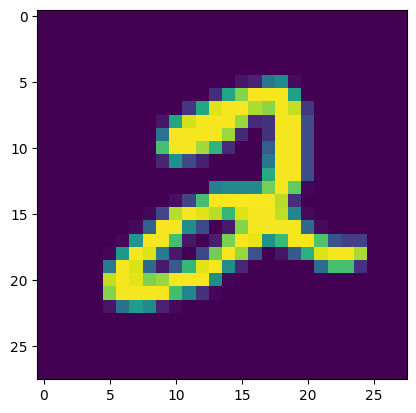

In [10]:
# Seeing the numeric data as visual image
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [15]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128,activation = "relu"))
model.add(Dense(10,activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compilation
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam')

In [27]:
# Storing results in the variable so we can plot the graphs over it
history = model.fit(X_train,y_train,epochs=10,validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0138 - val_loss: 0.0950
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0114 - val_loss: 0.0955
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0104 - val_loss: 0.0898
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0983
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0078 - val_loss: 0.1182
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0062 - val_loss: 0.1084
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0059 - val_loss: 0.1107
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0073 - val_loss: 0.1282
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0059 - val_loss: 0.1263
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0

In [22]:
# Model prediction
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [24]:
# Converting continuous values to the digit
y_prob= y_prob.argmax(axis=1)

In [25]:
y_prob

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
# Accuracy score finding
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prob)

0.9741

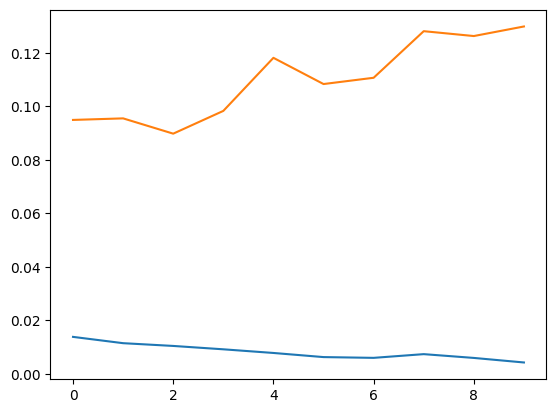

In [28]:
# This shows kind of overfitting in data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])